In [109]:
import json
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import statistics
import math

# Welcome to CINET

These are the results from training and testing the sci-kit learn implementation of DeepCINET and ECINET (linear CINET) on 21 drugs from CCLE, gCSI, and GDSC. 

#### Methodology

We have developed DeepCINET, a deep neural network used to rank samples based on genomic profiles. DeepCINET is inspired by Siamese networks composed of two identical “sister” neural nets, where a contrastive loss function is used to learn feature weights that maximally discriminate relative drug response between valid pairs of cell-lines. 

A hyper-parameter, delta, is used to define what a valid pair is by setting a minimum difference in drug response (AUC) for pairs to be included in model training, with the intuition that useful weights cannot be learned from samples that are too close together in response-space. Delta hyperparameters were tuned and the values used for the drugs can be found in files labelled "hparam_tuning_delta_DeepCINET.json" and "hparam_tuning_delta_ECINET.json" 

Concordance-Index was used to assess rank accuracy, and DeepCINET was then compared against a linear neural network.

The drugs tested include: 
* Erlotinib
* AZD7762
* Nilotinib
* Crizotinib
* Ibrutinib
* Vincristine
* Dasatinib
* 5-Fluorouracil
* Lapatinib
* Paclitaxel
* Pictilisib
* AZD8055
* Vorinostat
* Gefitinib
* MK-2206
* Dabrafenib
* Gemcitabine
* Bortezomib
* JQ1 compound
* PLX4720
* Docetaxel

#### Results

Out of the 21 drugs in our dataset, the neural network attained moderate to strong performance on nearly every drug, even across separate test datasets. We have done significantly better than random at ranking cell lines based on their gene expression.

The only exception is for the drug Nilotinib, where ECINET performed better in test datasets compared to DeepCINET. Otherwise, DeepCINET did better in 20 out of 21 drugs tested. 

#### Future Directions

Future directions involve using Shapley values in order to extract feature importances out of the model in order to discover novel biomarkers. Furethermore, it is important as a next step to validate some of the discovered biomarkers with patiernt survival data. 

In [75]:
# Load drug data JSON file
drug_data = json.load(open('./results.json'))

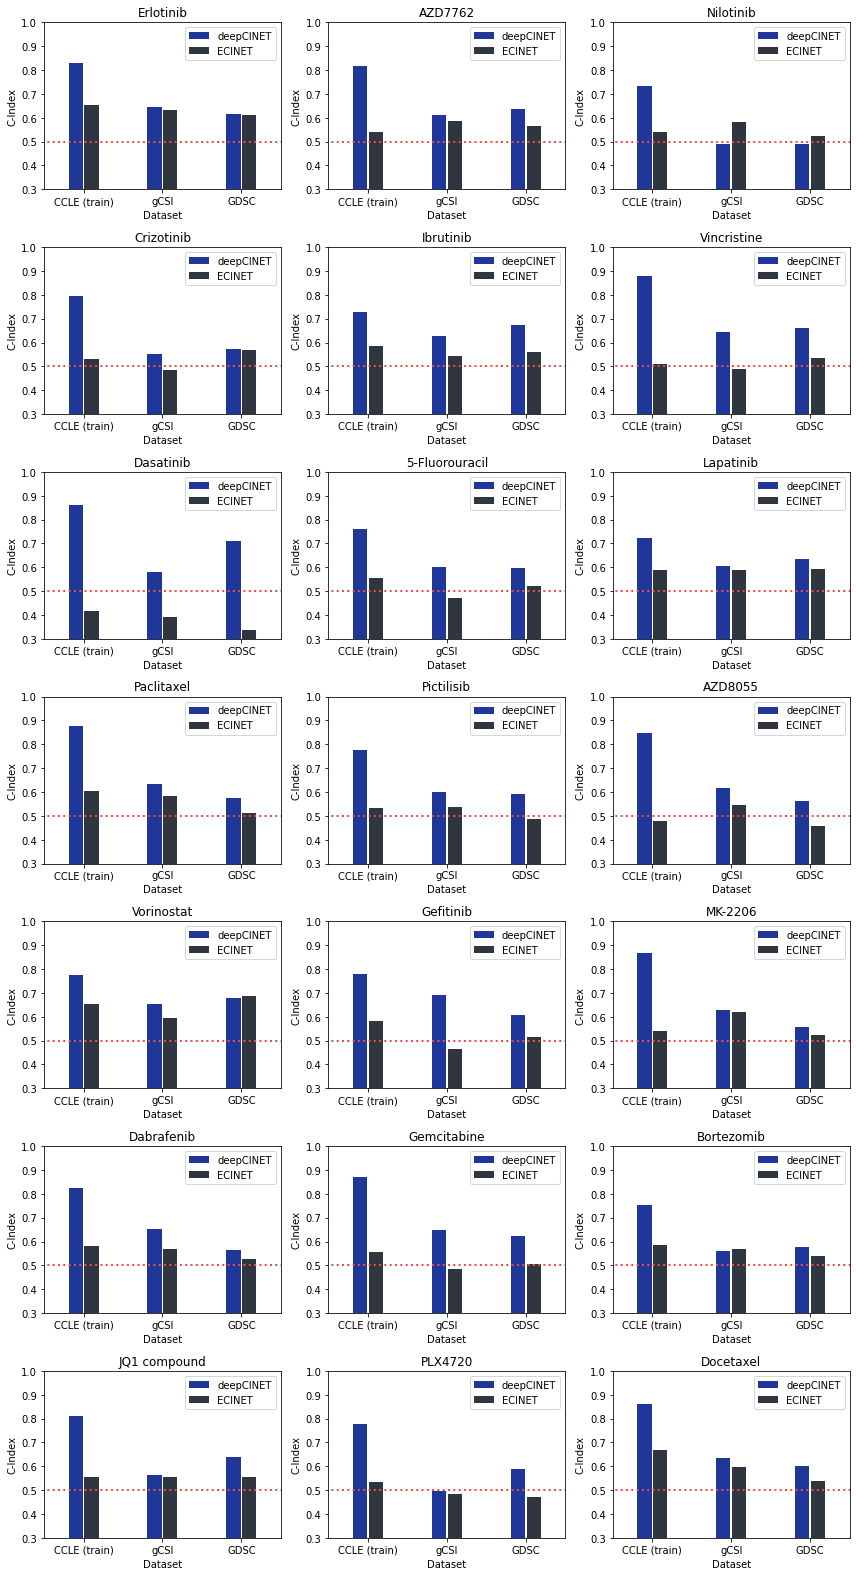

In [157]:
# Plot all of the results

fig, axis = plt.subplots(7,3, figsize=(12,22))

counter = 0
for key in drug_data:
#     figure(figsize=(4, 3), dpi=80)


    X = list(drug_data[key].keys())
    X[0] += (' (train)')

    # DC = deepCINET
    # EC = ECINET 

    Y_DC = []
    Y_EC = []

    for test_set in drug_data[key]:
        Y_DC.append(drug_data[key][test_set]['deepCINET'])
        Y_EC.append(drug_data[key][test_set]['ECINET'])    

    
    X_axis = np.arange(len(X))
    x_index = math.floor(counter / 3)
    y_index = counter % 3

    axis[x_index, y_index].bar(X_axis - 0.1, Y_DC, 0.18, label = 'deepCINET', color='#1e3799')
    axis[x_index, y_index].bar(X_axis + 0.1, Y_EC, 0.18, label = 'ECINET', color='#2f3640')
    axis[x_index, y_index].plot([-1,0,1,2,3], [.5,.5,.5,.5,.5], linewidth='2', linestyle='dotted', color='#eb4d4b', zorder=10)
    axis[x_index, y_index].set_title(key)
    axis[x_index, y_index].set_ylabel("C-Index")
    axis[x_index, y_index].set_xlabel("Dataset")
    axis[x_index, y_index].set_ylim(0.3, 1)
    axis[x_index, y_index].set_xlim(-0.5,2.5)
    axis[x_index, y_index].legend()
    axis[x_index, y_index].set_xticks(X_axis, X)
    counter += 1

plt.tight_layout()
plt.show()

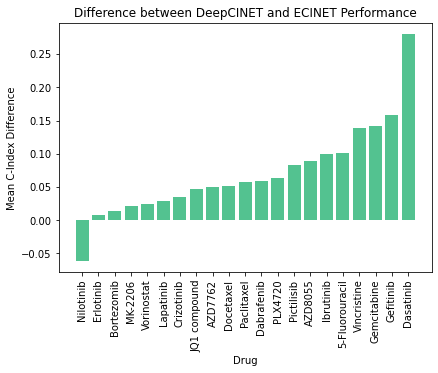

In [140]:
# Plot mean difference between DeepCINET and ECINET for different drugs

# First, get the differences and sort
data_dict = {}

for key in drug_data:
    differences = []
    for dset in drug_data[key]:
        if dset == 'CCLE': 
            continue # Skip the train set
        differences.append(drug_data[key][dset]['deepCINET'] - drug_data[key][dset]['ECINET'])
    
    data_dict[key] = statistics.mean(differences)
    
data_dict_ordered = dict(sorted(data_dict.items(), key=lambda item: item[1]))
        
X = list(data_dict_ordered.keys())
X_axis = np.arange(len(X))
Y = list(map(lambda x: x[1], list(data_dict_ordered.items())))

plt.bar(X_axis, Y, 0.8, color='#53c290')

plt.tight_layout()


plt.xticks(X_axis, X)
plt.xticks(rotation=90)
plt.xlabel("Drug")
plt.ylabel("Mean C-Index Difference")
plt.title("Difference between DeepCINET and ECINET Performance")
plt.show()